# Recommender Systems with Python

<img style="float: left;", src="images/film_scroll.png", width=400>

### One of the common use cases for Recommender Systems is for movies

#### Import pandas

In [1]:
import pandas as pd

#### Create dataframe based off of u.data

In [2]:
df = pd.read_csv('u.data')

In [3]:
df.head()

,0 50 5 881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116


**We recognize from the above that this is a '\t' delimited file. Let's also provide it with column names**

In [4]:
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=col_names)

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


#### Create a separate dataframe for movie titles

In [6]:
movies = pd.read_csv('Movie_Id_Titles')
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


#### Merge dataframes

In [7]:
df = pd.merge(df, movies, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## EDA

Exploring the data to find some of the best rated movies

#### Visualization imports

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

#### Groupby the title column, then call `.mean()` on the rating column, then sort the values with `ascending=False`

In [9]:
df.groupby('title')['rating'].mean().head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [10]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

#### Which titles have the most ratings?

In [11]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

#### Create a new dataframe of average ratings by title

In [12]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [13]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


#### Add num of ratings to the above dataframe

In [14]:
ratings['num_of_ratings'] = df.groupby('title')['rating'].count()

In [15]:
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


#### Create a histogram of the num_of_ratings

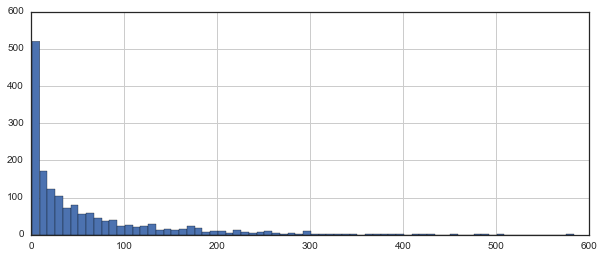

In [16]:
plt.figure(figsize=(10,4))
ratings['num_of_ratings'].hist(bins=70)

#### Create a histogram of the rating

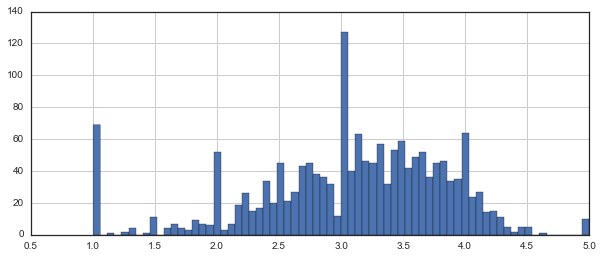

In [17]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

#### Create a jointplot of rating vs number of ratings

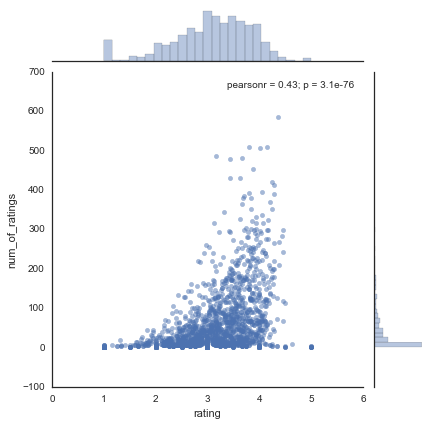

In [18]:
sns.jointplot('rating', 'num_of_ratings', data=ratings, alpha=.5)

In [19]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Building the Recommender System

Lets create a ratings matrix where the **user_id** is on the y-axis and the **title** is on the x-axis. Each cell will contain the rating a specific user gave to a particular movie. In this dataset, there are lots of NaN values, since most of the users have not seen most of the movies.

What does df look like again?

In [20]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


Create a pivot table (moviemat) with
> `index` = **user_id** 

> `columns` = **title** 

> `values` = **rating**

In [21]:
moviemat = pd.pivot_table(df, index='user_id', columns='title', values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### What were some of the most rated movies?

In [22]:
ratings.sort_values('num_of_ratings', ascending=False).head()

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


We will be focusing on 2 movies:

- Star Wars

- Liar Liar

#### What are the user ratings for the above two movies?

In [31]:
star_wars_user_ratings = moviemat['Star Wars (1977)']
liar_liar_user_ratings = moviemat['Liar Liar (1997)']

In [33]:
star_wars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

#### Use the `corrwith()` method to get correlations between two pandas series

In [34]:
similar_to_starwars = moviemat.corrwith(star_wars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liar_liar_user_ratings)

/Library/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


In [36]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

#### Let's clean this by removing NaN values and using a DataFrame instead of a series

In [40]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=["Correlation"])
corr_starwars.dropna(inplace=True)

In [41]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


#### Lets sort the Correlation column of the  corr_starwars dataframe to identify those movies with the stronges correlation

In [43]:
corr_starwars.sort_values('Correlation', ascending=False).head()

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


<img style="float: left;", src="images/stripes.png", width=600>

#### Stripes? Man of the Year? These don't seem to be very similar to Star Wars...
This is because there are a number of movies watched just a few (< 5) times by users who also watched Star Wars (the most popular movie).

So, because these users gave these films a high rating, they have a strong correlation with more popular films, even though they may be dissimlar to a popular film like Star Wars.

#### What does our distribution look like for ratings?

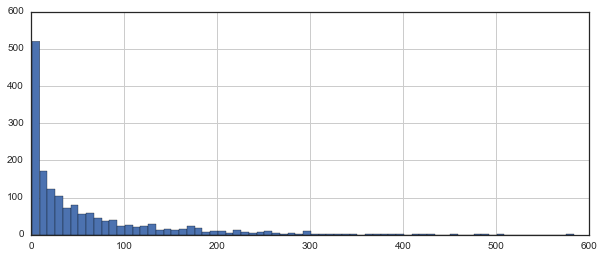

In [45]:
plt.figure(figsize=(10, 4))
ratings['num_of_ratings'].hist(bins=70)

We see from the above that most films are rated < 100 times. Lets fix our correlation dataframe by filtering out movies that have less than 100 reviews. 

Lets first attach the **num_of_ratings** column to our corr_starwars dataframe

In [47]:
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [48]:
corr_starwars.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Note that because the ratings and corr_starwars dataframes share an index, they are a good candidate for the `.join()` method

In [46]:
corr_starwars = corr_starwars.join(ratings['num_of_ratings'])
corr_starwars.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Finally, lets filter our dataframe where **num_of_ratings** > 100

In [52]:
corr_starwars[corr_starwars['num_of_ratings'] > 100].sort_values('Correlation', ascending=False).head()

,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


#### Lets do the same for the comedy, Liar Liar

In [66]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num_of_ratings'])
corr_liarliar[corr_liarliar['num_of_ratings'] > 100].sort_values('Correlation', ascending=False).head()

,Correlation,num_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
